# Reading the File

### Importing the basic libraries and reading the file

In [ ]:
!pip install lazypredict shap

In [ ]:
!pip install plotly

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from IPython.display import clear_output 
import ipywidgets as widgets
from IPython.display import display
import plotly.graph_objects as go
import plotly.express as px
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pydot
from sklearn import tree
from PIL import Image
from six import StringIO
from IPython.display import Image 
import pydotplus
import lazypredict
from lazypredict.Supervised import LazyClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import shap
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

In [ ]:
df=pd.read_excel('FileAndResults_Problem2.xlsx')

In [ ]:
df 

File Changed          Component     Coder       Tester  \
0             cpp/csyu/category/fnf    asr1001-flowpsk  Batukbaj        samsk   
1                    ignor-dp/build      asr1001-ignor      Alex  manishakang   
2                      ignor-dp/cdp      asr1001-ignor      Alex  manishakang   
3            ignor-dp/csco/affinity      asr1001-ignor      Alex  manishakang   
4                 ignor-dp/csco/cdp      asr1001-ignor      Alex  manishakang   
..                              ...                ...       ...          ...   
346                qkrvice/qk-infra                cgn      Alex  manishakang   
347            qkrvice/qk-infra-ipc             qk-cgn      Alex        samsk   
348                   qkrvice/qk-si                cgn      Alex  manishakang   
349           analyzedata/bmc-forge  asr1001-forge-cgn      Alex  manishakang   
350  analyzedata/forge-test-harness  asr1001-forge-cgn      Alex  manishakang   

        Category Sanity name nets Tested Sanity Result  
0     PD-asr1001  Thor_Vista     NCS5500          Pass  
1          Tools  vistra-cxr     NCS5500       Aborted  
2     PD-asr1001  vistra-cxr     NCS5500          Fail  
3     PD-asr1001  vistra-cxr     NCS5500       Aborted  
4     PD-asr1001  vistra-cxr     NCS5500       Aborted  
..           ...         ...         ...           ...  
346        PD-cm  vistra-cxr     NCS5500          Pass  
347        PD-cm  vistra-cxr     NCS5500          Fail  
348     PI-Infra  vistra-cxr     NCS5500          Pass  
349  analyzedata  vistra-cxr     NCS5500          Fail  
350  analyzedata  vistra-cxr     NCS5500          Fail  

[351 rows x 8 columns]

# Data Transformation

In [ ]:
#splitting file paths into super file and specific file
super_file=[]
specific_file=[]
for i in df['File Changed']:
  f=i.split('/')
  super_file.append(f[0])
  specific_file.append(f[-1])

In [ ]:
df['Super File']=super_file
df['Specific_File']=specific_file

In [ ]:
df

File Changed          Component     Coder       Tester  \
0             cpp/csyu/category/fnf    asr1001-flowpsk  Batukbaj        samsk   
1                    ignor-dp/build      asr1001-ignor      Alex  manishakang   
2                      ignor-dp/cdp      asr1001-ignor      Alex  manishakang   
3            ignor-dp/csco/affinity      asr1001-ignor      Alex  manishakang   
4                 ignor-dp/csco/cdp      asr1001-ignor      Alex  manishakang   
..                              ...                ...       ...          ...   
346                qkrvice/qk-infra                cgn      Alex  manishakang   
347            qkrvice/qk-infra-ipc             qk-cgn      Alex        samsk   
348                   qkrvice/qk-si                cgn      Alex  manishakang   
349           analyzedata/bmc-forge  asr1001-forge-cgn      Alex  manishakang   
350  analyzedata/forge-test-harness  asr1001-forge-cgn      Alex  manishakang   

        Category Sanity name nets Tested Sanity Result   Super File  \
0     PD-asr1001  Thor_Vista     NCS5500          Pass          cpp   
1          Tools  vistra-cxr     NCS5500       Aborted     ignor-dp   
2     PD-asr1001  vistra-cxr     NCS5500          Fail     ignor-dp   
3     PD-asr1001  vistra-cxr     NCS5500       Aborted     ignor-dp   
4     PD-asr1001  vistra-cxr     NCS5500       Aborted     ignor-dp   
..           ...         ...         ...           ...          ...   
346        PD-cm  vistra-cxr     NCS5500          Pass      qkrvice   
347        PD-cm  vistra-cxr     NCS5500          Fail      qkrvice   
348     PI-Infra  vistra-cxr     NCS5500          Pass      qkrvice   
349  analyzedata  vistra-cxr     NCS5500          Fail  analyzedata   
350  analyzedata  vistra-cxr     NCS5500          Fail  analyzedata   

          Specific_File  
0                   fnf  
1                 build  
2                   cdp  
3              affinity  
4                   cdp  
..                  ...  
346            qk-infra  
347        qk-infra-ipc  
348               qk-si  
349           bmc-forge  
350  forge-test-harness  

[351 rows x 10 columns]

In [ ]:
#looking at components which don't have their super component mentioned
count=0
for i in df['Component']:
  if('-' in i):
    pass
  else:
    count=count+1

In [ ]:
count

12

In [ ]:
#splitting component into super component and specific component
super_component=[]
specific_component=[]
for i in df['Component']:
  if('-' in i):
    l1=i.split('-')
    super_component.append(l1[0])
    specific_component.append(l1[-1])
  else:
    super_component.append(np.nan)
    specific_component.append(i)

In [ ]:
df['Super Component']=super_component
df['Specific Component']=specific_component

In [ ]:
df

File Changed          Component     Coder       Tester  \
0             cpp/csyu/category/fnf    asr1001-flowpsk  Batukbaj        samsk   
1                    ignor-dp/build      asr1001-ignor      Alex  manishakang   
2                      ignor-dp/cdp      asr1001-ignor      Alex  manishakang   
3            ignor-dp/csco/affinity      asr1001-ignor      Alex  manishakang   
4                 ignor-dp/csco/cdp      asr1001-ignor      Alex  manishakang   
..                              ...                ...       ...          ...   
346                qkrvice/qk-infra                cgn      Alex  manishakang   
347            qkrvice/qk-infra-ipc             qk-cgn      Alex        samsk   
348                   qkrvice/qk-si                cgn      Alex  manishakang   
349           analyzedata/bmc-forge  asr1001-forge-cgn      Alex  manishakang   
350  analyzedata/forge-test-harness  asr1001-forge-cgn      Alex  manishakang   

        Category Sanity name nets Tested Sanity Result   Super File  \
0     PD-asr1001  Thor_Vista     NCS5500          Pass          cpp   
1          Tools  vistra-cxr     NCS5500       Aborted     ignor-dp   
2     PD-asr1001  vistra-cxr     NCS5500          Fail     ignor-dp   
3     PD-asr1001  vistra-cxr     NCS5500       Aborted     ignor-dp   
4     PD-asr1001  vistra-cxr     NCS5500       Aborted     ignor-dp   
..           ...         ...         ...           ...          ...   
346        PD-cm  vistra-cxr     NCS5500          Pass      qkrvice   
347        PD-cm  vistra-cxr     NCS5500          Fail      qkrvice   
348     PI-Infra  vistra-cxr     NCS5500          Pass      qkrvice   
349  analyzedata  vistra-cxr     NCS5500          Fail  analyzedata   
350  analyzedata  vistra-cxr     NCS5500          Fail  analyzedata   

          Specific_File Super Component Specific Component  
0                   fnf         asr1001            flowpsk  
1                 build         asr1001              ignor  
2                   cdp         asr1001              ignor  
3              affinity         asr1001              ignor  
4                   cdp         asr1001              ignor  
..                  ...             ...                ...  
346            qk-infra             NaN                cgn  
347        qk-infra-ipc              qk                cgn  
348               qk-si             NaN                cgn  
349           bmc-forge         asr1001                cgn  
350  forge-test-harness         asr1001                cgn  

[351 rows x 12 columns]

In [ ]:
df.isnull().sum()

File Changed           0
Component              0
Coder                  0
Tester                14
Category               0
Sanity name            0
nets Tested            0
Sanity Result          0
Super File             0
Specific_File          0
Super Component       12
Specific Component     0
dtype: int64

In [ ]:
#dropping null values in Tester
df.dropna(subset=['Tester'], how='all', inplace=True)

In [ ]:
df.isnull().sum()

File Changed           0
Component              0
Coder                  0
Tester                 0
Category               0
Sanity name            0
nets Tested            0
Sanity Result          0
Super File             0
Specific_File          0
Super Component       12
Specific Component     0
dtype: int64

In [ ]:
#splitting multiple sanity tests and then creating duplicate columns using the same
for i in range(len(df['Sanity name'])):
  if(',' in df['Sanity name'][i]):
    l1=df['Sanity name'][i].split(',')
    for j in l1:
      row1 = pd.Series([df['File Changed'][i], df['Component'][i], df['Coder'][i], df['Tester'][i], df['Category'][i], j, df['nets Tested'][i],df['Sanity Result'][i],df['Super File'][i],df['Specific_File'][i],df['Super Component'][i],df['Specific Component'][i]], index=df.columns)
      df = df.append(row1,ignore_index=True)
    df.drop(i,inplace=True)
  else:
    pass

In [ ]:
df

File Changed          Component     Coder  \
0              cpp/csyu/category/fnf    asr1001-flowpsk  Batukbaj   
1                     ignor-dp/build      asr1001-ignor      Alex   
2                       ignor-dp/cdp      asr1001-ignor      Alex   
3             ignor-dp/csco/affinity      asr1001-ignor      Alex   
4                  ignor-dp/csco/cdp      asr1001-ignor      Alex   
..                               ...                ...       ...   
402  nets/vibe/fileresultvp/rm/qosrm     asr1001-ls-qos     chris   
403     nets/vibe/fileresultvp/rm/tm     asr1001-ls-qos     chris   
404      nets/vibe/ns/local_qkrvices  asr1001-forge-cgn   patrick   
405              nets/vibe/policymgr        asr1001-qos     chris   
406              nets/vibe/sim/infra  asr1001-forge-cgn      Alex   

          Tester    Category      Sanity name             nets Tested  \
0          samsk  PD-asr1001       Thor_Vista                 NCS5500   
1    manishakang       Tools       vistra-cxr                 NCS5500   
2    manishakang  PD-asr1001       vistra-cxr                 NCS5500   
3    manishakang  PD-asr1001       vistra-cxr                 NCS5500   
4    manishakang  PD-asr1001       vistra-cxr                 NCS5500   
..           ...         ...              ...                     ...   
402        samsk  PD-asr1001  vasr1001_sanity             asr1001-X64   
403        samsk  PD-asr1001        vistra-ls             asr1001-X64   
404  manishakang  PD-asr1001  vasr1001_sanity  asr1001-PX,asr1001-X64   
405        samsk  PD-asr1001       vistra-cxr  asr1001-PX,asr1001-X64   
406  manishakang  PD-asr1001       vistra-exr  asr1001-PX,asr1001-X64   

    Sanity Result Super File   Specific_File Super Component  \
0            Pass        cpp             fnf         asr1001   
1         Aborted   ignor-dp           build         asr1001   
2            Fail   ignor-dp             cdp         asr1001   
3         Aborted   ignor-dp        affinity         asr1001   
4         Aborted   ignor-dp             cdp         asr1001   
..            ...        ...             ...             ...   
402          Pass       nets           qosrm         asr1001   
403       Aborted       nets              tm         asr1001   
404       Aborted       nets  local_qkrvices         asr1001   
405       Aborted       nets       policymgr         asr1001   
406          Pass       nets           infra         asr1001   

    Specific Component  
0              flowpsk  
1                ignor  
2                ignor  
3                ignor  
4                ignor  
..                 ...  
402                qos  
403                qos  
404                cgn  
405                qos  
406                cgn  

[406 rows x 12 columns]

In [ ]:
#splitting multiple nets tested and then creating duplicate columns using the same
for i in range(len(df['nets Tested'])):
  if(',' in df['nets Tested'][i]):
    l1=df['nets Tested'][i].split(',')
    for j in l1:
      row1 = pd.Series([df['File Changed'][i], df['Component'][i], df['Coder'][i], df['Tester'][i], df['Category'][i], df['Sanity name'][i], j,df['Sanity Result'][i],df['Super File'][i],df['Specific_File'][i],df['Super Component'][i],df['Specific Component'][i]], index=df.columns)
      df = df.append(row1,ignore_index=True)
    df.drop(i,inplace=True)
  else:
    pass

In [ ]:
df

File Changed          Component      Coder       Tester  \
0          cpp/csyu/category/fnf    asr1001-flowpsk   Batukbaj        samsk   
1                 ignor-dp/build      asr1001-ignor       Alex  manishakang   
2                   ignor-dp/cdp      asr1001-ignor       Alex  manishakang   
3         ignor-dp/csco/affinity      asr1001-ignor       Alex  manishakang   
4              ignor-dp/csco/cdp      asr1001-ignor       Alex  manishakang   
..                           ...                ...        ...          ...   
528      nets/vibe/op/qkrvice/qk  asr1001-forge-cgn    patrick  manishakang   
529  nets/vibe/ns/local_qkrvices  asr1001-forge-cgn    patrick  manishakang   
530          nets/vibe/policymgr        asr1001-qos      chris        samsk   
531          nets/vibe/sim/infra  asr1001-forge-cgn       Alex  manishakang   
532    nets/cm/cis/category/edpl            cis-ogr  abhimanyu     sbejavad   

       Category      Sanity name  nets Tested Sanity Result Super File  \
0    PD-asr1001       Thor_Vista      NCS5500          Pass        cpp   
1         Tools       vistra-cxr      NCS5500       Aborted   ignor-dp   
2    PD-asr1001       vistra-cxr      NCS5500          Fail   ignor-dp   
3    PD-asr1001       vistra-cxr      NCS5500       Aborted   ignor-dp   
4    PD-asr1001       vistra-cxr      NCS5500       Aborted   ignor-dp   
..          ...              ...          ...           ...        ...   
528  PD-asr1001  vasr1001_sanity  asr1001-X64          Pass       nets   
529  PD-asr1001  vasr1001_sanity   asr1001-PX       Aborted       nets   
530  PD-asr1001       vistra-cxr  asr1001-X64       Aborted       nets   
531  PD-asr1001       vistra-exr   asr1001-PX          Pass       nets   
532   PD-kitefg   ncs5500_Sanity  asr1001-X64          Pass       nets   

      Specific_File Super Component Specific Component  
0               fnf         asr1001            flowpsk  
1             build         asr1001              ignor  
2               cdp         asr1001              ignor  
3          affinity         asr1001              ignor  
4               cdp         asr1001              ignor  
..              ...             ...                ...  
528              qk         asr1001                cgn  
529  local_qkrvices         asr1001                cgn  
530       policymgr         asr1001                qos  
531           infra         asr1001                cgn  
532            edpl             cis                ogr  

[532 rows x 12 columns]

In [ ]:
#dropping rows with components which don't have a super component mentioned
df.dropna(subset=['Super Component'],how='all',inplace=True)

In [ ]:
df.isnull().sum()

File Changed          0
Component             0
Coder                 0
Tester                0
Category              0
Sanity name           0
nets Tested           0
Sanity Result         0
Super File            0
Specific_File         0
Super Component       0
Specific Component    0
dtype: int64

In [ ]:
df

File Changed          Component      Coder       Tester  \
0          cpp/csyu/category/fnf    asr1001-flowpsk   Batukbaj        samsk   
1                 ignor-dp/build      asr1001-ignor       Alex  manishakang   
2                   ignor-dp/cdp      asr1001-ignor       Alex  manishakang   
3         ignor-dp/csco/affinity      asr1001-ignor       Alex  manishakang   
4              ignor-dp/csco/cdp      asr1001-ignor       Alex  manishakang   
..                           ...                ...        ...          ...   
528      nets/vibe/op/qkrvice/qk  asr1001-forge-cgn    patrick  manishakang   
529  nets/vibe/ns/local_qkrvices  asr1001-forge-cgn    patrick  manishakang   
530          nets/vibe/policymgr        asr1001-qos      chris        samsk   
531          nets/vibe/sim/infra  asr1001-forge-cgn       Alex  manishakang   
532    nets/cm/cis/category/edpl            cis-ogr  abhimanyu     sbejavad   

       Category      Sanity name  nets Tested Sanity Result Super File  \
0    PD-asr1001       Thor_Vista      NCS5500          Pass        cpp   
1         Tools       vistra-cxr      NCS5500       Aborted   ignor-dp   
2    PD-asr1001       vistra-cxr      NCS5500          Fail   ignor-dp   
3    PD-asr1001       vistra-cxr      NCS5500       Aborted   ignor-dp   
4    PD-asr1001       vistra-cxr      NCS5500       Aborted   ignor-dp   
..          ...              ...          ...           ...        ...   
528  PD-asr1001  vasr1001_sanity  asr1001-X64          Pass       nets   
529  PD-asr1001  vasr1001_sanity   asr1001-PX       Aborted       nets   
530  PD-asr1001       vistra-cxr  asr1001-X64       Aborted       nets   
531  PD-asr1001       vistra-exr   asr1001-PX          Pass       nets   
532   PD-kitefg   ncs5500_Sanity  asr1001-X64          Pass       nets   

      Specific_File Super Component Specific Component  
0               fnf         asr1001            flowpsk  
1             build         asr1001              ignor  
2               cdp         asr1001              ignor  
3          affinity         asr1001              ignor  
4               cdp         asr1001              ignor  
..              ...             ...                ...  
528              qk         asr1001                cgn  
529  local_qkrvices         asr1001                cgn  
530       policymgr         asr1001                qos  
531           infra         asr1001                cgn  
532            edpl             cis                ogr  

[519 rows x 12 columns]

In [ ]:
#creating a dataframe picking the features we wish to train the model on
columns=['Coder','Tester','Category','Sanity name','nets Tested','Super File','Specific_File','Super Component','Specific Component','Sanity Result']
df_ml=df[columns]

In [ ]:
df_ml

Coder       Tester    Category      Sanity name  nets Tested  \
0     Batukbaj        samsk  PD-asr1001       Thor_Vista      NCS5500   
1         Alex  manishakang       Tools       vistra-cxr      NCS5500   
2         Alex  manishakang  PD-asr1001       vistra-cxr      NCS5500   
3         Alex  manishakang  PD-asr1001       vistra-cxr      NCS5500   
4         Alex  manishakang  PD-asr1001       vistra-cxr      NCS5500   
..         ...          ...         ...              ...          ...   
528    patrick  manishakang  PD-asr1001  vasr1001_sanity  asr1001-X64   
529    patrick  manishakang  PD-asr1001  vasr1001_sanity   asr1001-PX   
530      chris        samsk  PD-asr1001       vistra-cxr  asr1001-X64   
531       Alex  manishakang  PD-asr1001       vistra-exr   asr1001-PX   
532  abhimanyu     sbejavad   PD-kitefg   ncs5500_Sanity  asr1001-X64   

    Super File   Specific_File Super Component Specific Component  \
0          cpp             fnf         asr1001            flowpsk   
1     ignor-dp           build         asr1001              ignor   
2     ignor-dp             cdp         asr1001              ignor   
3     ignor-dp        affinity         asr1001              ignor   
4     ignor-dp             cdp         asr1001              ignor   
..         ...             ...             ...                ...   
528       nets              qk         asr1001                cgn   
529       nets  local_qkrvices         asr1001                cgn   
530       nets       policymgr         asr1001                qos   
531       nets           infra         asr1001                cgn   
532       nets            edpl             cis                ogr   

    Sanity Result  
0            Pass  
1         Aborted  
2            Fail  
3         Aborted  
4         Aborted  
..            ...  
528          Pass  
529       Aborted  
530       Aborted  
531          Pass  
532          Pass  

[519 rows x 10 columns]

In [ ]:
df_ml2=df_ml.copy()

In [ ]:
df_ml2

Coder       Tester    Category      Sanity name  nets Tested  \
0     Batukbaj        samsk  PD-asr1001       Thor_Vista      NCS5500   
1         Alex  manishakang       Tools       vistra-cxr      NCS5500   
2         Alex  manishakang  PD-asr1001       vistra-cxr      NCS5500   
3         Alex  manishakang  PD-asr1001       vistra-cxr      NCS5500   
4         Alex  manishakang  PD-asr1001       vistra-cxr      NCS5500   
..         ...          ...         ...              ...          ...   
528    patrick  manishakang  PD-asr1001  vasr1001_sanity  asr1001-X64   
529    patrick  manishakang  PD-asr1001  vasr1001_sanity   asr1001-PX   
530      chris        samsk  PD-asr1001       vistra-cxr  asr1001-X64   
531       Alex  manishakang  PD-asr1001       vistra-exr   asr1001-PX   
532  abhimanyu     sbejavad   PD-kitefg   ncs5500_Sanity  asr1001-X64   

    Super File   Specific_File Super Component Specific Component  \
0          cpp             fnf         asr1001            flowpsk   
1     ignor-dp           build         asr1001              ignor   
2     ignor-dp             cdp         asr1001              ignor   
3     ignor-dp        affinity         asr1001              ignor   
4     ignor-dp             cdp         asr1001              ignor   
..         ...             ...             ...                ...   
528       nets              qk         asr1001                cgn   
529       nets  local_qkrvices         asr1001                cgn   
530       nets       policymgr         asr1001                qos   
531       nets           infra         asr1001                cgn   
532       nets            edpl             cis                ogr   

    Sanity Result  
0            Pass  
1         Aborted  
2            Fail  
3         Aborted  
4         Aborted  
..            ...  
528          Pass  
529       Aborted  
530       Aborted  
531          Pass  
532          Pass  

[519 rows x 10 columns]

In [ ]:
X_display = df_ml2.iloc[:, :-1].values
y_display = df_ml2.iloc[:, -1].values

### Label Encoding all the columns for data modelling

In [ ]:
le1=LabelEncoder()
df_ml['Coder']=le1.fit_transform(df_ml['Coder'])

In [ ]:
le2=LabelEncoder()
df_ml['Tester']=le2.fit_transform(df_ml['Tester'])

In [ ]:
le3=LabelEncoder()
df_ml['Category']=le3.fit_transform(df_ml['Category'])

In [ ]:
le4=LabelEncoder()
df_ml['Sanity name']=le4.fit_transform(df_ml['Sanity name'])

In [ ]:
le5=LabelEncoder()
df_ml['nets Tested']=le5.fit_transform(df_ml['nets Tested'])

In [ ]:
le6=LabelEncoder()
df_ml['Super File']=le6.fit_transform(df_ml['Super File'])

In [ ]:
le7=LabelEncoder()
df_ml['Specific_File']=le7.fit_transform(df_ml['Specific_File'])

In [ ]:
le8=LabelEncoder()
df_ml['Super Component']=le8.fit_transform(df_ml['Super Component'])

In [ ]:
le9=LabelEncoder()
df_ml['Specific Component']=le9.fit_transform(df_ml['Specific Component'])

In [ ]:
le10=LabelEncoder()
df_ml['Sanity Result']=le10.fit_transform(df_ml['Sanity Result'])

In [ ]:
df_ml

Coder  Tester  Category  Sanity name  nets Tested  Super File  \
0        1      12         4            7            2           1   
1        0       7         9           20            2           2   
2        0       7         4           20            2           2   
3        0       7         4           20            2           2   
4        0       7         4           20            2           2   
..     ...     ...       ...          ...          ...         ...   
528      6       7         4           19           15           4   
529      6       7         4           19           13           4   
530      4      12         4           20           15           4   
531      0       7         4           24           13           4   
532      2      13         6           14           15           4   

     Specific_File  Super Component  Specific Component  Sanity Result  
0               30                0                   7              2  
1               12                0                   8              0  
2               14                0                   8              1  
3                0                0                   8              0  
4               14                0                   8              0  
..             ...              ...                 ...            ...  
528             73                0                   4              2  
529             53                0                   4              0  
530             70                0                  17              0  
531             36                0                   4              2  
532             25                1                  13              2  

[519 rows x 10 columns]

### Oversampling the data and preparing it for the model

In [ ]:
#Following data is highly imbalanced and hence needs to be balanced
df_ml['Sanity Result'].value_counts()

2    342
0     91
1     86
Name: Sanity Result, dtype: int64

In [ ]:
X = df_ml.iloc[:, :-1].values
y = df_ml.iloc[:, -1].values

In [ ]:
#Over Sampling the Data

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 342), (1, 342), (2, 342)]


In [ ]:
#Over Sampling the Labelled Data
ros = RandomOverSampler(random_state=0)
X_resampled_display, y_resampled_display = ros.fit_resample(X_display, y_display)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 342), (1, 342), (2, 342)]


In [ ]:
X=X_resampled
y=y_resampled

In [ ]:
X_display = X_resampled_display 
y_display = y_resampled_display

In [ ]:
print(sorted(Counter(y).items()))

[(0, 342), (1, 342), (2, 342)]


In [ ]:
print(sorted(Counter(y_display).items()))

[('Aborted', 342), ('Fail', 342), ('Pass', 342)]


In [ ]:
#Splitting the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 32)

# Visualizing and Analyzing the Data to create inferences on the probability of failure

In [ ]:
!pip install ipywidgets

In [ ]:
!pip install plotly

### An Interactive Menu to visualize the distribution and impact of all the attributes on the Target Variable Sanity Result

In [ ]:


w = widgets.Dropdown(
    options=['Sanity Result Distribution for Coders','Sanity Result Distribution for Testers','Sanity Result Distribution for Coder-Tester Combinations','Sanity Result Distribution for Categories','Sanity Result Distribution for Super File','Sanity Result Distribution for Specific File','Sanity Result Distribution for Sanity Name','Sanity Result Distribution for Nets Tested','Sanity Result Distribution for Super Component','Sanity Result Distribution for Specific Component'],
    value=None
)


def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        if(change['new']=='Sanity Result Distribution for Coders'):
          coder_plot(change['new'])
        elif(change['new']=='Sanity Result Distribution for Testers'):
          tester_plot(change['new'])
        elif(change['new']=='Sanity Result Distribution for Coder-Tester Combinations'):
          coder_tester_plot(change['new'])
        elif(change['new']=='Sanity Result Distribution for Categories'):
          category_plot(change['new'])
        elif(change['new']=='Sanity Result Distribution for Super File'):
          super_file_plot(change['new'])
        elif(change['new']=='Sanity Result Distribution for Specific File'):
          specific_file_plot(change['new'])
        elif(change['new']=='Sanity Result Distribution for Sanity Name'):
          sanity_name_plot(change['new'])
        elif(change['new']=='Sanity Result Distribution for Nets Tested'):
          nets_tested_plot(change['new'])
        elif(change['new']=='Sanity Result Distribution for Super Component'):
          super_component_plot(change['new'])
        elif(change['new']=='Sanity Result Distribution for Specific Component'):
          specific_component_plot(change['new'])
w.observe(on_change)

display(w)

def coder_plot(name):
    fig=px.histogram(df, x="Coder", color="Sanity Result",barmode='group')
    fig.update_layout(
    title={
        'text': name,
        'font':{'size':28},
        'x':0.484,
        'xanchor': 'center'})
    fig.show()

def tester_plot(name):
    fig=px.histogram(df, x="Tester", color="Sanity Result",barmode='group')
    fig.update_layout(
    title={
        'text': name,
        'font':{'size':28},
        'x':0.484,
        'xanchor': 'center'})
    fig.show()

def coder_tester_plot(name):
    df_vizz=df['Coder']+'-'+df['Tester']
    fig=px.histogram(x=df_vizz.values, color=df["Sanity Result"],barmode='group')
    fig.update_layout(
    title={
        'text': name,
        'font':{'size':28},
        'x':0.484,
        'xanchor': 'center'})
    fig.show()

def category_plot(name):
    fig=px.histogram(df, x="Category", color="Sanity Result",barmode='group')
    fig.update_layout(
    title={
        'text': name,
        'font':{'size':28},
        'x':0.484,
        'xanchor': 'center'})
    fig.show()

def super_file_plot(name):
    fig=px.histogram(df_ml2, x="Super File", color="Sanity Result",barmode='group')
    fig.update_layout(
    title={
        'text': name,
        'font':{'size':28},
        'x':0.484,
        'xanchor': 'center'})
    fig.show()

def specific_file_plot(name):
    fig=px.histogram(df_ml2, x="Specific_File", color="Sanity Result",barmode='group')
    fig.update_layout(
    title={
        'text': name,
        'font':{'size':28},
        'x':0.484,
        'xanchor': 'center'})
    fig.show()

def sanity_name_plot(name):
    fig=px.histogram(df_ml2, x="Sanity name", color="Sanity Result",barmode='group')
    fig.update_layout(
    title={
        'text': name,
        'font':{'size':28},
        'x':0.484,
        'xanchor': 'center'})
    fig.show()

def nets_tested_plot(name):
    fig=px.histogram(df_ml2, x="nets Tested", color="Sanity Result",barmode='group')
    fig.update_layout(
    title={
        'text': name,
        'font':{'size':28},
        'x':0.484,
        'xanchor': 'center'})
    fig.show()

def super_component_plot(name):
    fig=px.histogram(df_ml2, x="Super Component", color="Sanity Result",barmode='group')
    fig.update_layout(
    title={
        'text': name,
        'font':{'size':28},
        'x':0.484,
        'xanchor': 'center'})
    fig.show()

def specific_component_plot(name):
    fig=px.histogram(df_ml2, x="Specific Component", color="Sanity Result",barmode='group')
    fig.update_layout(
    title={
        'text': name,
        'font':{'size':28},
        'x':0.484,
        'xanchor': 'center'})
    fig.show()

Dropdown(options=('Sanity Result Distribution for Coders', 'Sanity Result Distribution for Testers', 'Sanity R…

### An Interactive Menu to see the performance stats of each coder

In [ ]:

w = widgets.Dropdown(
    options=df['Coder'].unique(),
    value= None
)



def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        plot_this(change['new'])

w.observe(on_change)

display(w)

def plot_this(name):
    clear_output()
    display(w)
    df_vizz=df[df['Coder']==name]
    fig=px.pie(df_vizz,names='Sanity Result')
    fig.update_layout(
    title={
        'text': f"Distribution of Sanity Result for Coder {name}",
        'font':{'size':28},
        'x':0.484,
        'xanchor': 'center'})
    fig.show()

Dropdown(options=('Batukbaj', 'Alex', 'patrick', 'abhimanyu', 'actalivineo', 'daffoil', 'chris'), value='Batuk…

### An Interactive Menu to analyse the work of each tester

In [ ]:


w = widgets.Dropdown(
    options=df['Tester'].unique(),
    value= None
)



def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        plot_this(change['new'])

w.observe(on_change)

display(w)

def plot_this(name):
    clear_output()
    display(w)
    df_vizz=df[df['Tester']==name]
    fig=px.pie(df_vizz,names='Sanity Result')
    fig.update_layout(
    title={
        'text': f"Distribution of Sanity Result for Tester {name}",
        'font':{'size':28},
        'x':0.484,
        'xanchor': 'center'})
    fig.show()

Dropdown(index=1, options=('samsk', 'manishakang', 'nel', 'pinkasr', 'yung', 'akafsg', 'kris', 'sbejavad', 'ar…

# Machine Learning Model

### Using Decision Tree to gain an understanding of the importance of each feature

In [ ]:
classifier2=DecisionTreeClassifier()
classifier2.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = classifier2.predict(X_test)

In [ ]:
arr=classifier2.feature_importances_

In [ ]:
df_plot=df_ml.drop('Sanity Result',axis=1)

In [ ]:
arr2=df_plot.columns

### Bar Plot Showcasing the importance of each column

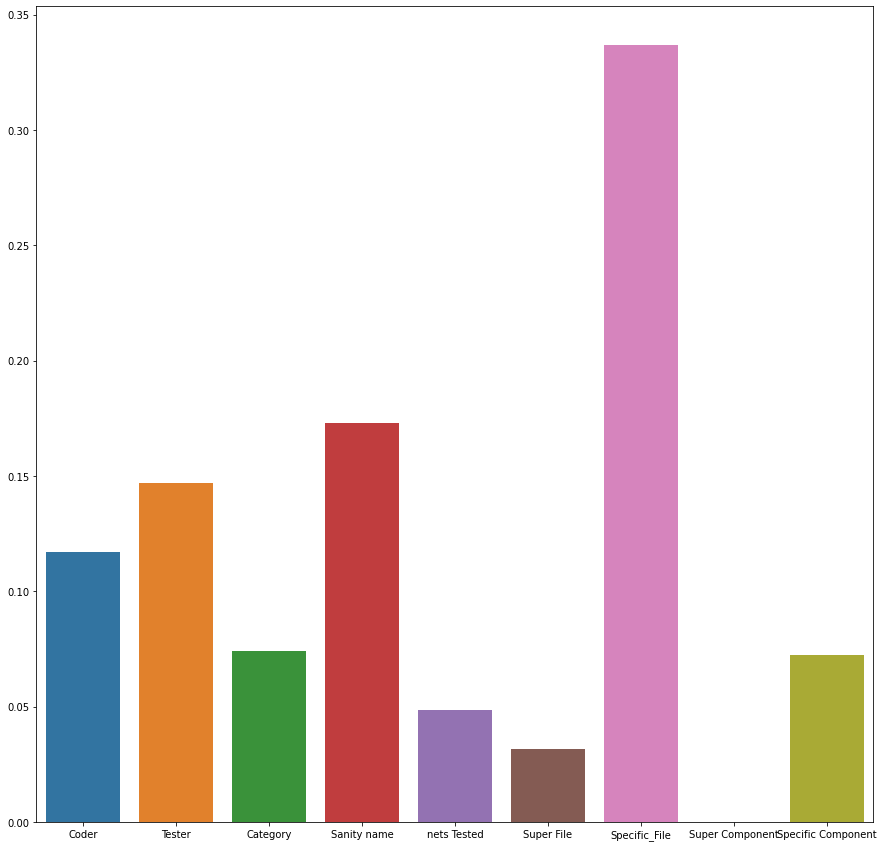

In [ ]:
plt.figure(figsize=(15,15))
sns.barplot(x=arr2,y=arr)

In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Using the Lazy Predict Classifier to gain an insight about how each model performs

In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 29/29 [00:01<00:00, 17.31it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     0.97               0.97    None      0.97   
DecisionTreeClassifier             0.97               0.97    None      0.97   
ExtraTreesClassifier               0.96               0.96    None      0.96   
ExtraTreeClassifier                0.96               0.96    None      0.96   
RandomForestClassifier             0.95               0.95    None      0.95   
BaggingClassifier                  0.95               0.95    None      0.95   
LabelPropagation                   0.95               0.95    None      0.95   
LabelSpreading                     0.95               0.95    None      0.95   
XGBClassifier                      0.93               0.93    None      0.93   
KNeighborsClassifier               0.87               0.87    None      0.87   
AdaBoostClassifier                 0.83 

In [ ]:
models

Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     0.97               0.97    None      0.97   
DecisionTreeClassifier             0.97               0.97    None      0.97   
ExtraTreesClassifier               0.96               0.96    None      0.96   
ExtraTreeClassifier                0.96               0.96    None      0.96   
RandomForestClassifier             0.95               0.95    None      0.95   
BaggingClassifier                  0.95               0.95    None      0.95   
LabelPropagation                   0.95               0.95    None      0.95   
LabelSpreading                     0.95               0.95    None      0.95   
XGBClassifier                      0.93               0.93    None      0.93   
KNeighborsClassifier               0.87               0.87    None      0.87   
AdaBoostClassifier                 0.83               0.83    None      0.83   
SVC                                0.79               0.79    None      0.78   
NuSVC                              0.77               0.77    None      0.76   
CalibratedClassifierCV             0.64               0.64    None      0.63   
LogisticRegression                 0.64               0.64    None      0.63   
LinearDiscriminantAnalysis         0.63               0.63    None      0.61   
RidgeClassifier                    0.63               0.63    None      0.61   
RidgeClassifierCV                  0.63               0.63    None      0.61   
LinearSVC                          0.63               0.63    None      0.61   
BernoulliNB                        0.61               0.61    None      0.61   
SGDClassifier                      0.61               0.61    None      0.61   
QuadraticDiscriminantAnalysis      0.61               0.61    None      0.59   
NearestCentroid                    0.59               0.60    None      0.59   
GaussianNB                         0.59               0.59    None      0.58   
Perceptron                         0.50               0.50    None      0.48   
PassiveAggressiveClassifier        0.42               0.42    None      0.37   
DummyClassifier                    0.33               0.33    None      0.16   

                               Time Taken  
Model                                      
LGBMClassifier                       0.14  
DecisionTreeClassifier               0.01  
ExtraTreesClassifier                 0.15  
ExtraTreeClassifier                  0.01  
RandomForestClassifier               0.20  
BaggingClassifier                    0.04  
LabelPropagation                     0.05  
LabelSpreading                       0.06  
XGBClassifier                        0.12  
KNeighborsClassifier                 0.02  
AdaBoostClassifier                   0.11  
SVC                                  0.05  
NuSVC                                0.05  
CalibratedClassifierCV               0.37  
LogisticRegression                   0.02  
LinearDiscriminantAnalysis           0.02  
RidgeClassifier                      0.01  
RidgeClassifierCV                    0.01  
LinearSVC                            0.12  
BernoulliNB                          0.01  
SGDClassifier                        0.02  
QuadraticDiscriminantAnalysis        0.01  
NearestCentroid                      0.01  
GaussianNB                           0.01  
Perceptron                           0.01  
PassiveAggressiveClassifier          0.02  
DummyClassifier                      0.01

In [ ]:

fig=px.bar(x=models['Accuracy'],y=models.index)
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.show()

In [ ]:
fig=px.bar(x=models['Time Taken'],y=models.index)
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.show()

In [ ]:
df_ml.columns

Index(['Coder', 'Tester', 'Category', 'Sanity name', 'nets Tested',
       'Super File', 'Specific_File', 'Super Component', 'Specific Component',
       'Sanity Result'],
      dtype='object')

### Fitting the data into a Decision Tree Model

In [ ]:
#using the decision tree classifier
classifier = DecisionTreeClassifier(criterion= 'entropy',random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

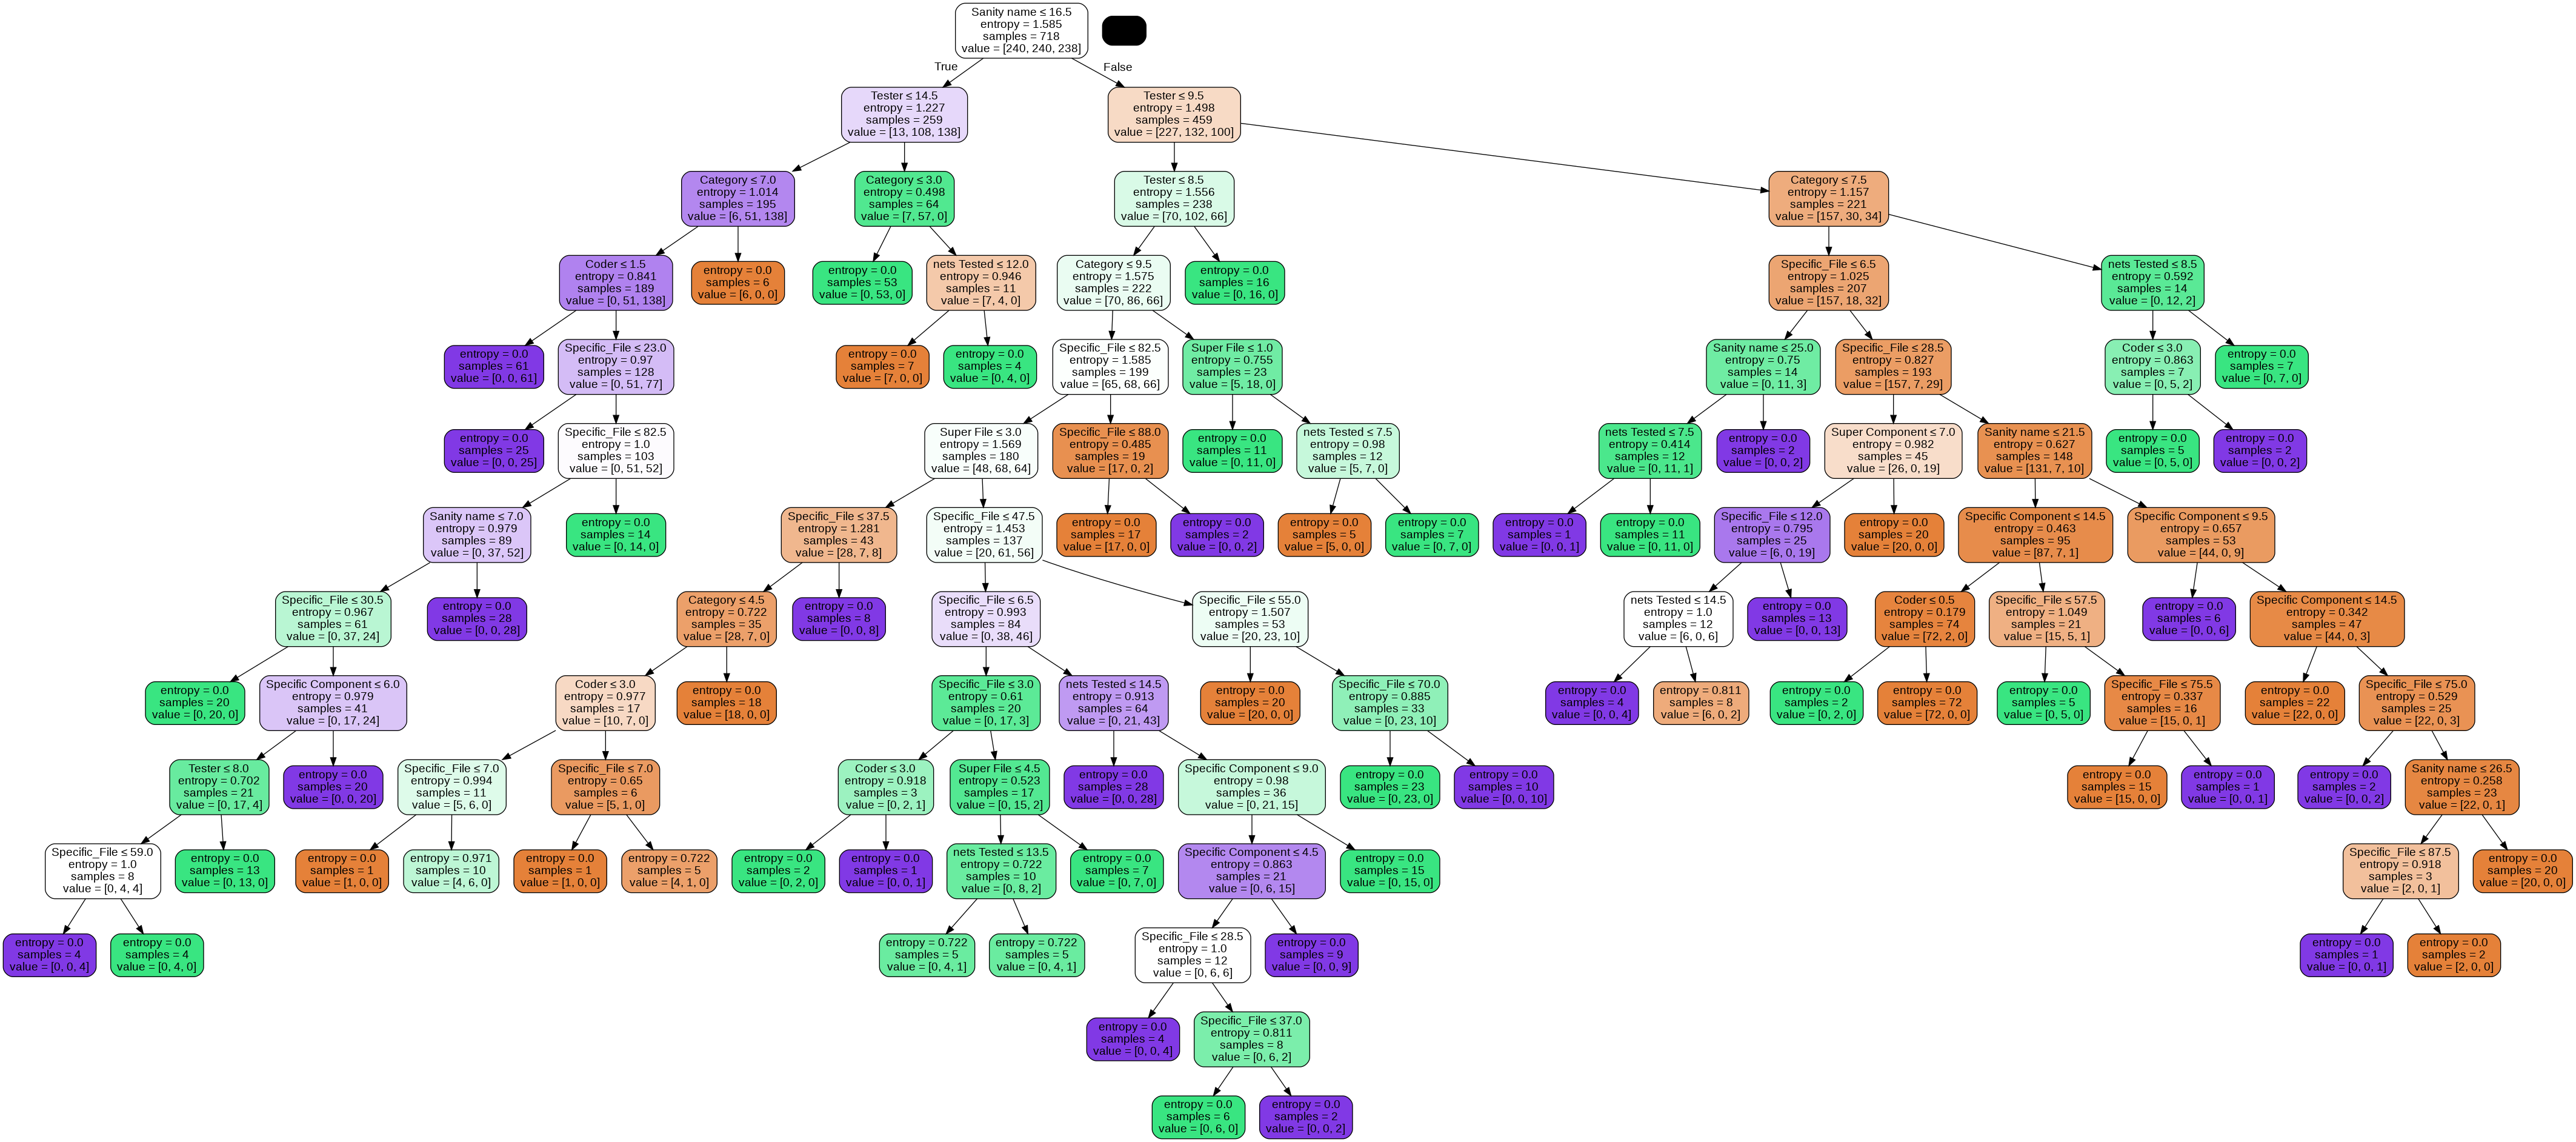

In [ ]:
#plotting the decision tree in order to visualize it
dot_data = StringIO()
tree.export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=['Coder', 'Tester', 'Category', 'Sanity name', 'nets Tested', 'Super File', 'Specific_File', 'Super Component', 'Specific Component'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Tree After Pruning

In [ ]:
#using the decision tree classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier(criterion= 'entropy',random_state=42, ccp_alpha=0.005)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.005, criterion='entropy', random_state=42)

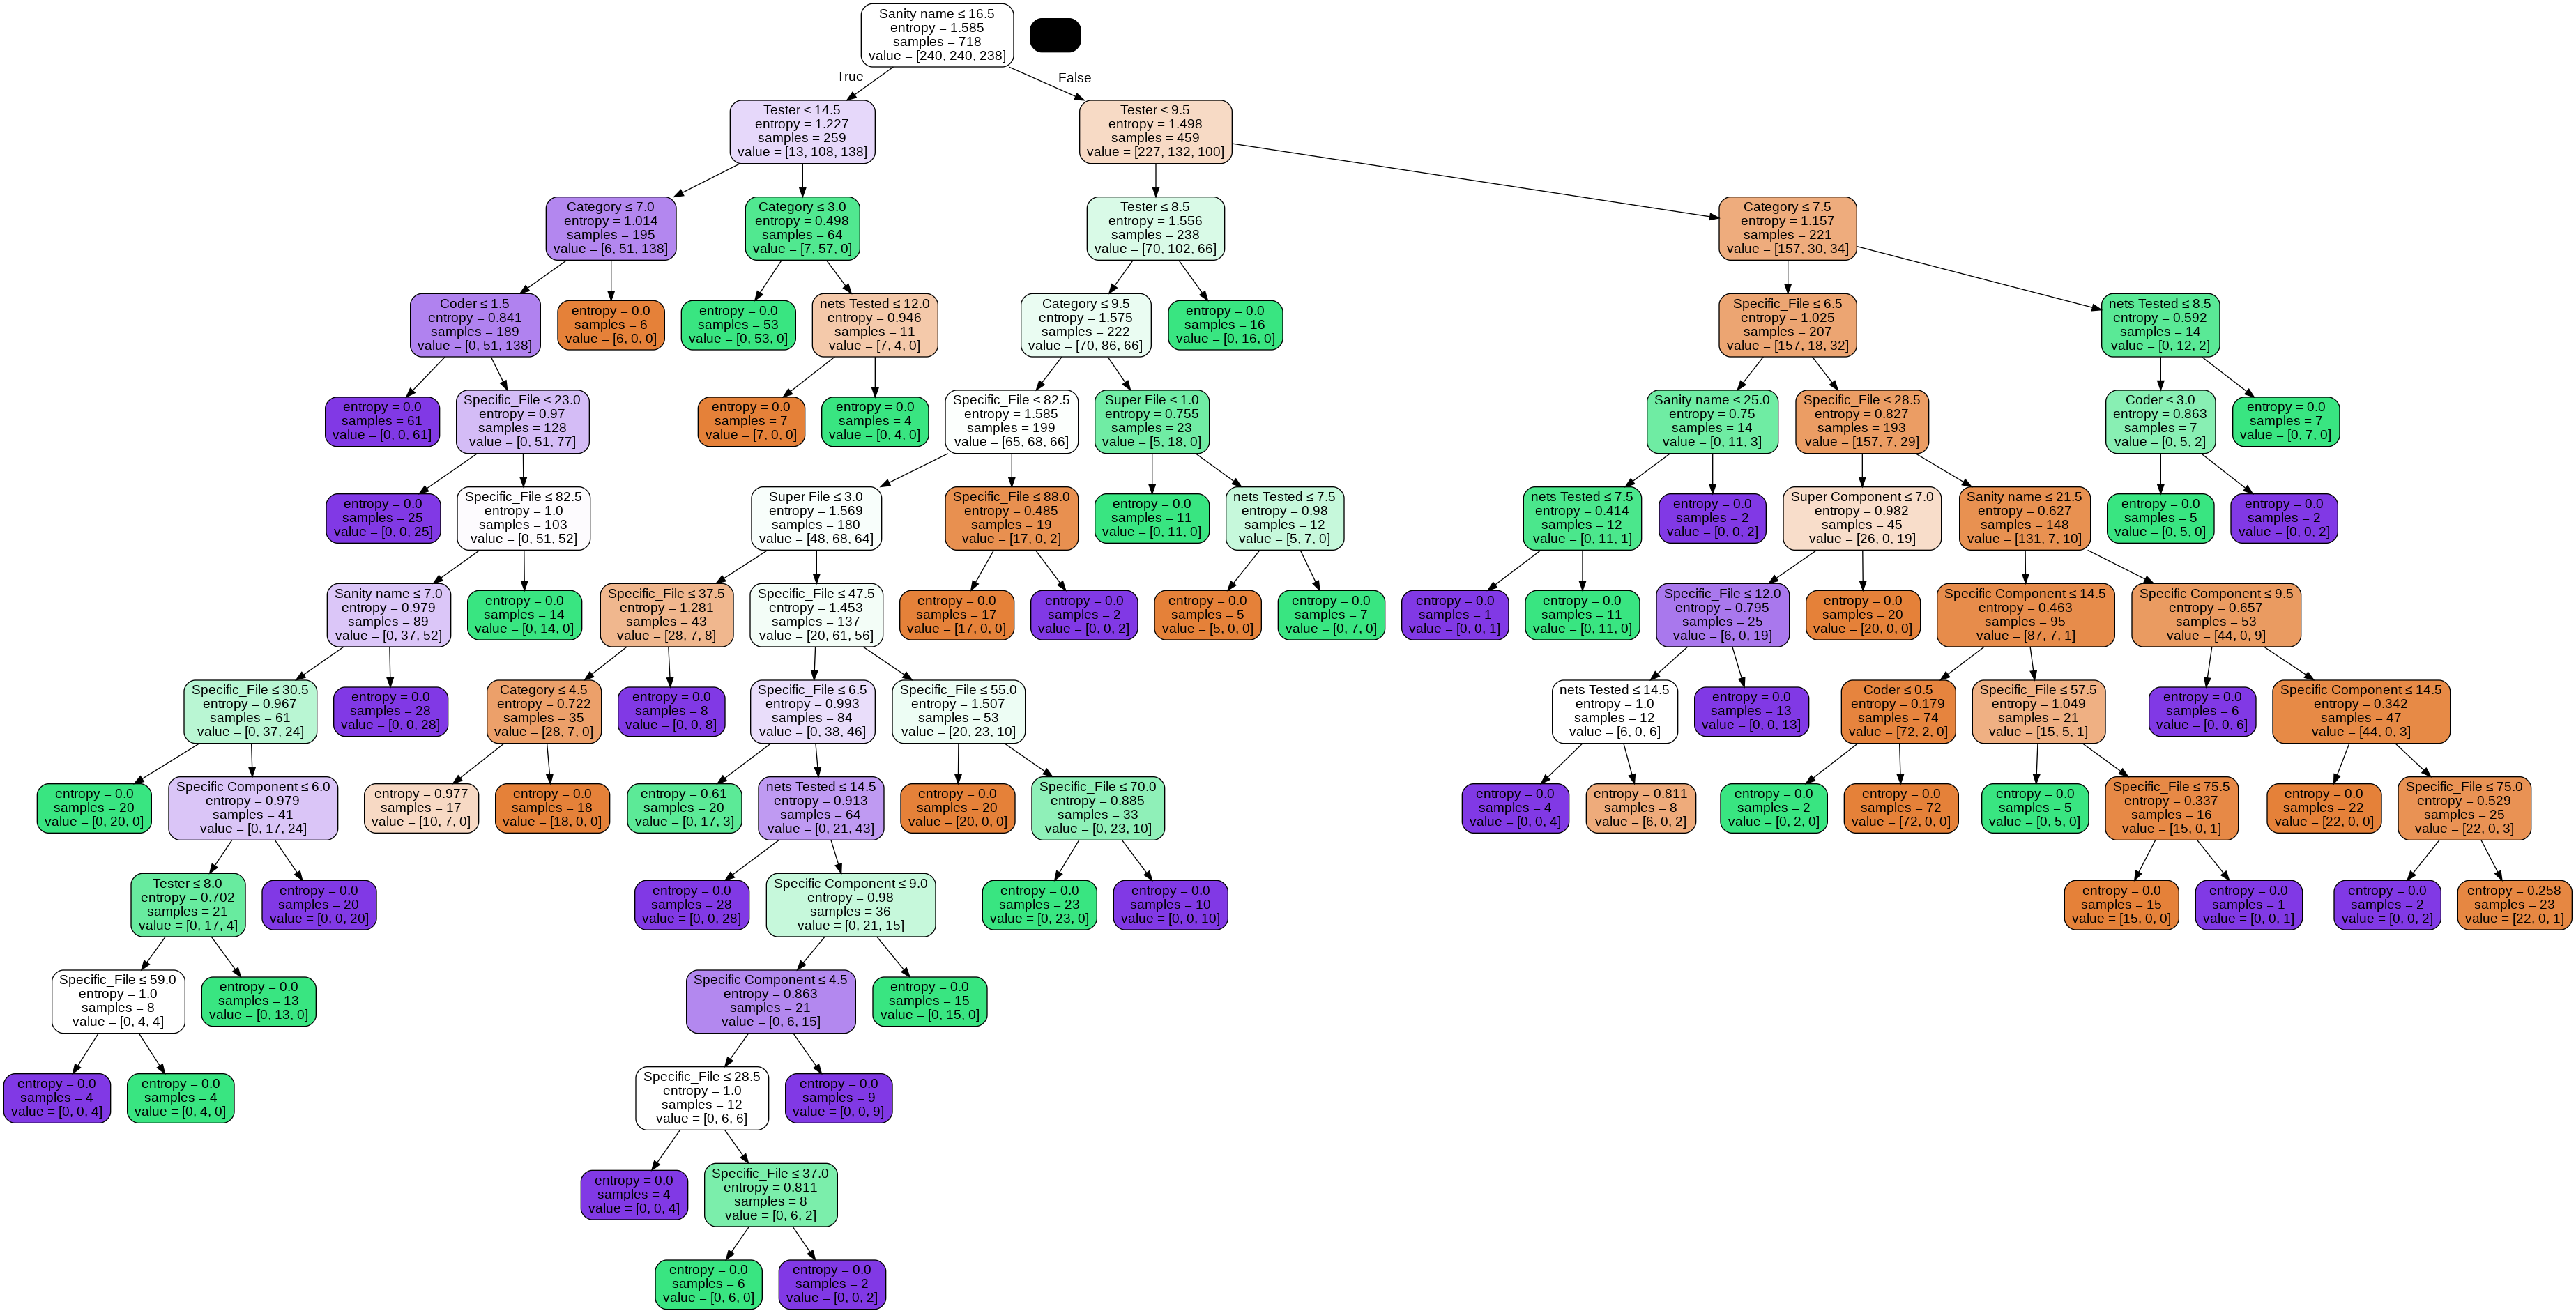

In [ ]:
#plotting the decision tree in order to visualize it
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=['Coder', 'Tester', 'Category', 'Sanity name', 'nets Tested', 'Super File', 'Specific_File', 'Super Component', 'Specific Component'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
y_pred = classifier.predict(X_test)

# Model Performance

### Accuracy for testing data

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[101   1   0]
 [  2 100   0]
 [  3   3  98]]


0.9707792207792207

### F1 Score for Testing Data

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
f1_score(y_test, y_pred, average='micro')

[[101   1   0]
 [  2 100   0]
 [  3   3  98]]


0.9707792207792207

In [ ]:
y_pred2 = classifier.predict(X_train)

### Accuracy for training data

In [ ]:
cm = confusion_matrix(y_train, y_pred2)
print(cm)
accuracy_score(y_train, y_pred2)

[[236   4   0]
 [  1 239   0]
 [  2   2 234]]


0.9874651810584958

In [ ]:
cm = confusion_matrix(y_train, y_pred2)
print(cm)
f1_score(y_train, y_pred2, average='micro')

[[236   4   0]
 [  1 239   0]
 [  2   2 234]]


0.9874651810584958

# Using SHAP to visualize and analyse feature importance in Detail

In [ ]:
!pip install shap

In [ ]:
X_display = pd.DataFrame(X_display)

In [ ]:
shap.initjs()
explainer = shap.TreeExplainer(model=classifier,data=df_ml,model_output='probability')
shap_values = explainer.shap_values(X)
l1=list(df_ml.columns)
l1.remove('Sanity Result')
shap.force_plot(explainer.expected_value[0], shap_values[0][0:], X_display.iloc[0:],feature_names=l1)

In [ ]:
shap.initjs()
explainer = shap.TreeExplainer(model=classifier,data=df_ml,model_output='probability')
shap_values = explainer.shap_values(X)
shap.force_plot(explainer.expected_value[1], shap_values[1][0:], X_display.iloc[0:],feature_names=l1)

In [ ]:
shap.initjs()
explainer = shap.TreeExplainer(model=classifier,data=df_ml,model_output='probability')
shap_values = explainer.shap_values(X)
shap.force_plot(explainer.expected_value[2], shap_values[2][0:], X_display.iloc[0:],feature_names=l1)

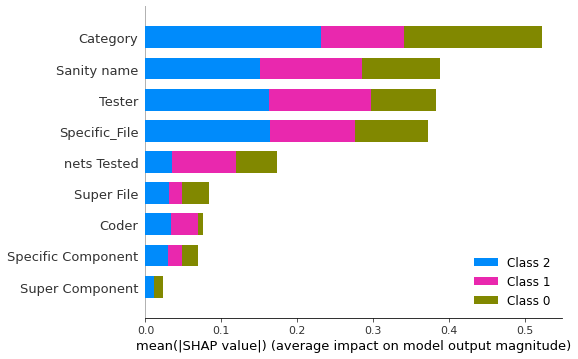

In [ ]:
shap.summary_plot(shap_values, X,plot_type="bar", feature_names=df_ml.columns)